# IBM cloud deployment

Team ID - PNT2022TMID39413

Project Name - A Novel Method for Handwritten Digit Recognition System

# Importing the required libraries

In [1]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 578.1 MB 38 kB/s s eta 0:00:01MB 22.7 MB/s eta 0:00:23��████                        | 146.4 MB 76.2 MB/s eta 0:00:06��██▉     | 484.0 MB 84.9 MB/s eta 0:00:02
     |████████████████████████████████| 438 kB 76.6 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 81.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 83.0 MB/s eta 0:00:01
     |████████████████████████████████| 14.1 MB 81.4 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 80.9 MB/s eta 0:00:01
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.12.0
    Uninstalling absl-py-0.12.0:
      Successfully uninstalled absl-py-0.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
 

In [2]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #convolutional Layer
from keras.utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

2022-11-17 09:49:00.284053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-17 09:49:00.315953: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-17 09:49:00.985256: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-17 09:49:00.985428: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could 

# Load the  data

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data() #splitting the mnist data into train and test

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

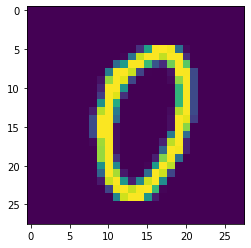

In [6]:
plt.imshow(x_train[1000])     #ploting the index=image

In [7]:
np.argmax(y_train[1000])

0

# Reshaping Dataset

In [8]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [9]:
number_of_classes = 10  #storing the no of classes in a variable

In [10]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [11]:
#create model
model=Sequential ()

2022-11-17 09:50:19.021038: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-17 09:50:19.021052: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [13]:
#flatten the dimension of the image
model.add(Flatten())

In [14]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [15]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [16]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [17]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.2504 - accuracy: 0.9516 - val_loss: 0.0718 - val_accuracy: 0.9768
Epoch 2/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.0712 - accuracy: 0.9780 - val_loss: 0.0734 - val_accuracy: 0.9786
Epoch 3/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0487 - accuracy: 0.9846 - val_loss: 0.0805 - val_accuracy: 0.9784
Epoch 4/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0366 - accuracy: 0.9879 - val_loss: 0.0878 - val_accuracy: 0.9783
Epoch 5/5
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0924 - val_accuracy: 0.9797


# Observing the metrics

In [18]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.09236139804124832, 0.9797000288963318]


# Test The Model

In [19]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 82ms/step
[[7.9159639e-12 3.1782916e-14 7.0695489e-12 2.1944341e-07 1.2977506e-01
  4.2653696e-06 1.9823563e-11 1.3820516e-10 7.4161562e-06 8.7021309e-01]]


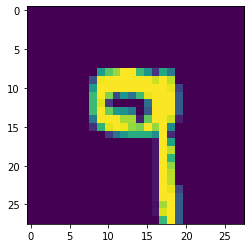

In [21]:
plt.imshow(x_test[6000])

In [22]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [23]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

# Save The model

In [24]:
# Save the model
model.save('models/mnistCNN.h5')

In [25]:
cd models

/home/wsuser/work/models


In [26]:
!tar -zcvf handwritten-digit-recognition-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [27]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 20.5 MB/s eta 0:00:01


# Cloud deploy

In [28]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"MU9U9WIH61uFyhySD4dSKqfUsPrWtgmFczQQY-BKO2a_"
}
client = APIClient(credentials)

In [29]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/37dd17ecbb3744569f560346860eca80:d6964611-5ebf-47f5-86d8-31a3af5f9dff::',
      'guid': 'd6964611-5ebf-47f5-86d8-31a3af5f9dff',
      'name': 'Watson Machine Learning-ho',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Handwritten Digit Recognition',
    'scope': {'bss_account_id': '37dd17ecbb3744569f560346860eca80'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '196d9700-6d71-4718-aafd-a02259f12faa',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '65642717af1848b78d5d87ff8be960c8',
        'api_key': 'HV5U_l_n38QdViH4vkoIZto1iSE06NE7yDY_cFDMBBps',
        'secret_access_key': '3a05a169da0e70f507342cf47058359bb56c72c954ead8ee',
        'service_id': 'ServiceId-974109e4-8113-4913-b55a-1e1c797e51e3'},
       'editor': {'access_key_id': 'a81fbd8a37b3441b8dbbea1d63c1d642',

In [30]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [31]:
space_uid = guid_from_space_name(client,'Handwritten Digit Recognition')
print("Space UID = " + space_uid)

Space UID = 79d7e3aa-666a-4d11-b80b-8b9ffd2360f4


In [32]:
client.set.default_space(space_uid)

'SUCCESS'

In [33]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [37]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [41]:
model_details = client.repository.store_model(model='handwritten-digit-recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_rt22.1",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})
model_id = client.repository.get_model_id(model_details)

In [42]:
model_id

'b76eed2d-c833-45ea-82aa-5233f8535332'

In [43]:
client.repository.download(model_id,'DigitRecoginition_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecoginition_IBM_model.tar.gz'


'/home/wsuser/work/models/DigitRecoginition_IBM_model.tar.gz'

In [44]:
ls

DigitRecoginition_IBM_model.tar.gz           mnistCNN.h5
handwritten-digit-recognition-model_new.tgz


# TEST the MODEL

In [45]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [46]:
model = load_model("mnistCNN.h5")

In [49]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='dLBLwZFrVXhKq2BX-wWNeOF6cMV9fyjCbug8QE8ZraJt',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwriteendigitrecognition-donotdelete-pr-z0hzyrcagadedr'
object_key = 'imagesibm.png'

streaming_body_7 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/



In [53]:
img = Image.open(streaming_body_1).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [54]:
img

In [55]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [58]:
pred = model.predict(im2arr)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[8.1288903e-07 1.9290863e-10 2.2956178e-07 1.4551279e-04 2.7422969e-10
  6.0855143e-10 1.8511307e-13 9.9984407e-01 1.0949848e-06 8.2292263e-06]]


# Output

In [59]:
print(np.argmax(pred, axis=1)) #printing our Labels

[7]
